<a href="https://colab.research.google.com/github/solankinitin1210/Capstone-Project-Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## **First Things First**

We will mount the drive and import libraries those are required throughout the course of our analysis.

In [ ]:
# Mount driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries for process data
import pandas as pd
import numpy as np
from numpy import math

# Import libraries for ploting data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import display_html 


# **Loading Dataset**

In [ ]:
#importing the dataset in our colab envirnoment
df=pd.read_excel('/content/drive/MyDrive/Almabetter/Capstone Project 4/Online Retail.xlsx')

#  **Initial Data review**

In [ ]:
# Let's have a look first five rows of our dataset to have a lookover
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
## Let's have a look at last five rows of our dataset to have a lookover
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
## Let's have a look over the number of rows and columns in our dataset
shape=df.shape
print("The data set contains {} Transactions.\nNumber of features are: {}. ".format(shape[0],(shape[1])))

The data set contains 541909 Transactions.
Number of features are: 8. 


In [ ]:
## Let's just inspect the dataset for datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Getting the list of all the features
print("Features of the dataset are:")
df.columns

Features of the dataset are:


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#Having a look the number of countries we have data for
#Storing the countries as a set for future use
countries=set(df['Country'].unique())
num_of_countries=df.Country.nunique()
print(countries)
print('Number of countries are:{}'.format(num_of_countries))

{'Finland', 'Unspecified', 'France', 'Hong Kong', 'Poland', 'Bahrain', 'Canada', 'RSA', 'Spain', 'Germany', 'Belgium', 'Denmark', 'Iceland', 'Netherlands', 'Japan', 'Channel Islands', 'Israel', 'Brazil', 'European Community', 'Czech Republic', 'Saudi Arabia', 'Portugal', 'EIRE', 'Lithuania', 'USA', 'Cyprus', 'Norway', 'Malta', 'United Arab Emirates', 'Sweden', 'Italy', 'Greece', 'Australia', 'United Kingdom', 'Austria', 'Switzerland', 'Lebanon', 'Singapore'}
Number of countries are:38


In [ ]:
#Getting the statistical Summary of our dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#Find Unique values for Invoice,Customer,Product,Country
df[['InvoiceNo','CustomerID','StockCode','Country']].nunique()

InvoiceNo     25900
CustomerID     4372
StockCode      4070
Country          38
dtype: int64

### **From the above review on dataset we have some observations:**


1. Most Invoices appear as normal transcations with positive quantity and prices, but there are some  values in the quantity column that are addressed as negative quatity posses invoice number starting with 'C',therefore all these belong to cancelled orders.
2. Empty or Null values are in CustomerID are around 135080 that need to be treated.
3. Here we have a data for 38 different countries.
4. There are total 10624 record where the quantity is negative.
5. Average Unit price of all the items in the store is coming out to be 4.6 sterling.
6. Most expensive item in the store is Manual,whose cost is 38970 sterling and that too is a cancelled order.
7. We should further break-down the InvoiceDate column to draw some more insights.



In [ ]:
# Let's check the null values for all the columns
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.isnull().sum() * 100 / len(df)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

Text(0.5, 1.0, 'Percentage of missing values per columns')

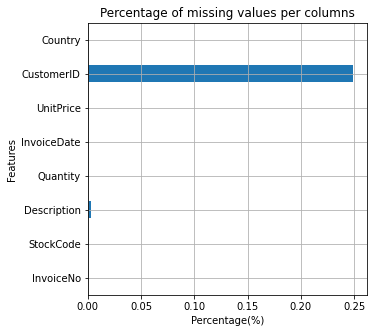

In [ ]:
#Plot to show the percentage of missing values n the data set
plt.figure(figsize=(5, 5))

df.isnull().mean(axis=0).plot.barh()

plt.grid()
plt.xlabel("Percentage(%)")
plt.ylabel("Features")
plt.title("Percentage of missing values per columns")

Maximum number of missing values are coming from customer_id and we will drop such values.

## Dropping the Null Values

In [ ]:
#Dropping the null values in the dataset
df.dropna(subset=['CustomerID'],inplace=True)

Text(0.5, 1.0, 'Percentage of missing values per columns')

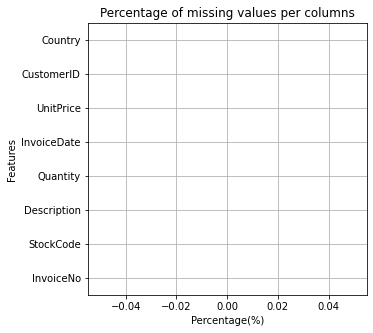

In [ ]:
#Let's see the applied changes through the plot:
plt.figure(figsize=(5, 5))

df.isnull().mean(axis=0).plot.barh()

plt.grid()
plt.xlabel("Percentage(%)")
plt.ylabel("Features")
plt.title("Percentage of missing values per columns")

### **2. Checking for the Duplicate values:**

In [ ]:
# Checking for duplicates in our dataset
# duplicate=df.duplicated().any()
if df.duplicated().any():
    print("Duplicate Rows in our dataset are: {}".format(df.duplicated().sum()))
else:
    print("There are no duplicate records present in our dataset")

Duplicate Rows in our dataset are: 5225


If two records are same,the StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country but invoice number cannot be same therefore we must drop the duplicate records.

## Drop the Duplicate values from the dataset

In [ ]:
#Drop the duplicated values
df.drop_duplicates(inplace=True)
print("Shape of the data set after dropping the duplicates is :\n{}".format(df.shape))

Shape of the data set after dropping the duplicates is :
(401604, 8)


# **EDA and Visualzation**

In [ ]:
#Let's have a look at number of unique values in each feature 
features=df.columns
features

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#Let's have a look at the unique values in each column
for feature in features:
    print(feature,':')
    print(df[feature].nunique())
    print("-----------------")

InvoiceNo :
22190
-----------------
StockCode :
3684
-----------------
Description :
3896
-----------------
Quantity :
436
-----------------
InvoiceDate :
20460
-----------------
UnitPrice :
620
-----------------
CustomerID :
4372
-----------------
Country :
37
-----------------


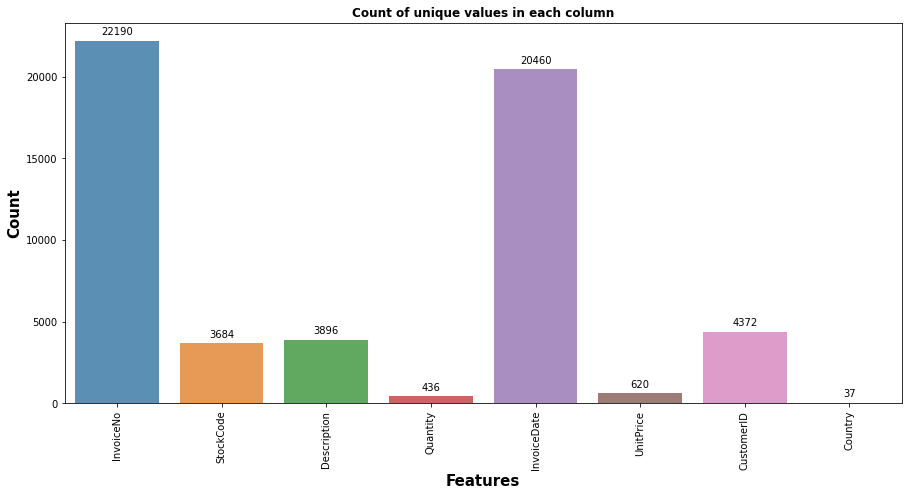

In [ ]:
#Let's understand the unique values through visualization

#Let's create a dataframe for the number of unique values 
df_nunique=pd.DataFrame()
df_nunique['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
df_nunique['Uniques']=unique

# Plot the bar plot for the above results
f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=df_nunique['Features'], y=df_nunique['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Count of unique values in each column',weight='bold')
plt.ylabel('Count', size=15, weight='bold')
plt.xlabel('Features', size=15, weight='bold')
plt.xticks(rotation=90)
plt.show()

1. Although our dataset has initially 541909 records but the number of unique invoices generated are very less.
2. The number of unique countries available with us are 37 but before we did data preprocessing it was 38.We must look for the country that has vanished from the data.

In [ ]:
#Getting the unique number of countries after the data preprocessing
countries_final=set(df.Country.unique())

#Let's just find the country that got vanished from the dataset
country_leftout=countries-countries_final
country_leftout

{'Hong Kong'}

Therefore,HonKong that got vanished away in the data preprocessing stage.

### **Top 10 Countries w.r.t The Number Of Invoices Generated**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


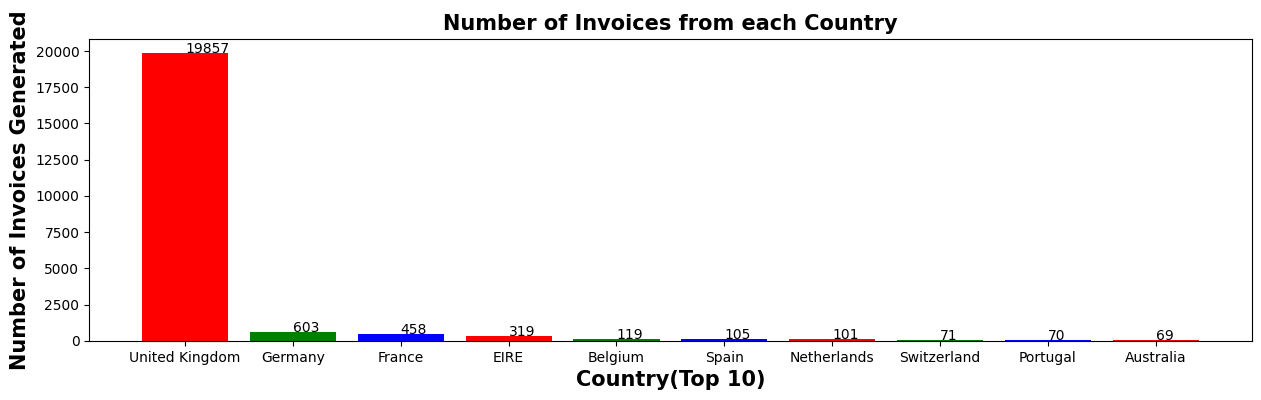

In [ ]:
# Let's learn through the visualization
fig, ax = plt.subplots(figsize=(15,4),dpi=100)
plt.style.use('seaborn-colorblind')


# Define x and y 
x=country_df['Country']
y=country_df['InvoiceNo']

# Plot the bar plot
plt.bar(x,y,color="rgb")

# Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country(Top 10)", weight="bold",size=15)
plt.ylabel("Number of Invoices Generated",weight="bold",size=15)
plt.title("Number of Invoices from each Country",weight="bold",size=15)

## Showing the plot
plt.show()

In [ ]:
#Let's create a dataframe 
country_df = df.groupby('Country')[['InvoiceNo']].nunique().sort_values(by='InvoiceNo', ascending=False).head(10).reset_index()
country_df

,Country,InvoiceNo
0,United Kingdom,19857
1,Germany,603
2,France,458
3,EIRE,319
4,Belgium,119
5,Spain,105
6,Netherlands,101
7,Switzerland,71
8,Portugal,70
9,Australia,69


### **Top 10 Countries w.r.t The Number Of Orders Sucessfully Generated** 

In [ ]:
## Generating the dataframe of country w.r.t the Sucessfull orders generated
sales_df = df[~df['InvoiceNo'].str.startswith('C',na=False)].groupby('Country')[['InvoiceNo']].nunique().sort_values(by='InvoiceNo', ascending=False).head(10).reset_index()
sales_df

,Country,InvoiceNo
0,United Kingdom,16649
1,Germany,457
2,France,389
3,EIRE,260
4,Belgium,98
5,Netherlands,95
6,Spain,90
7,Australia,57
8,Portugal,57
9,Switzerland,51


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.


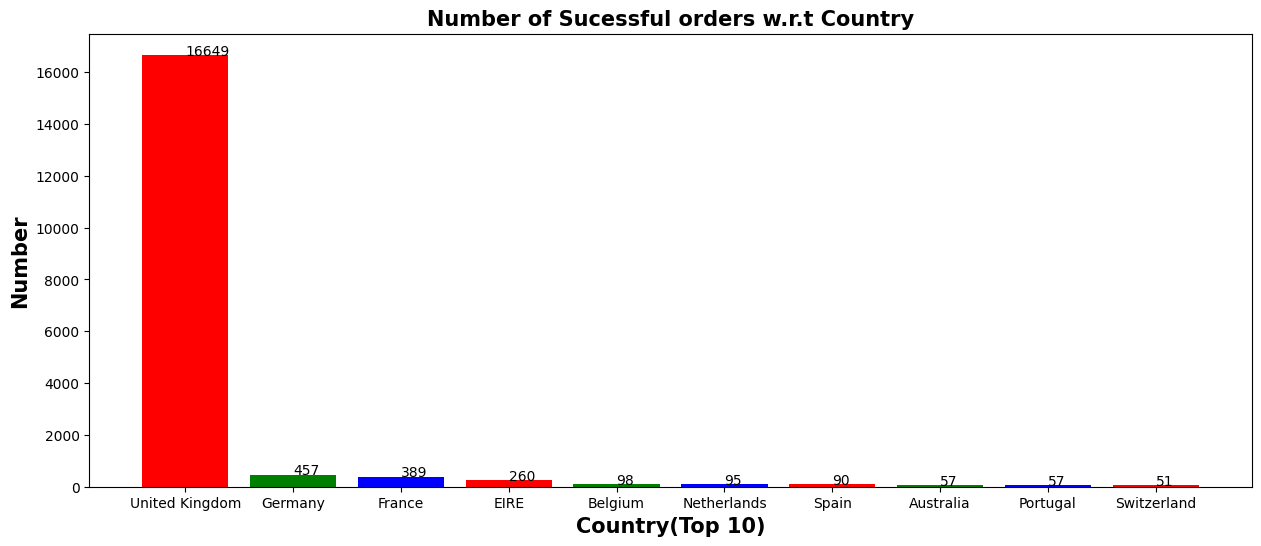

In [ ]:
# Let's learn through the visualization
fig, ax = plt.subplots(figsize=(15,6),dpi=100)
plt.style.use('seaborn-colorblind')

# Define x and y 
x=sales_df['Country']
y=sales_df['InvoiceNo']

# Plot the bar plot
plt.bar(x,y,color="rgb")

# Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country(Top 10)", weight="bold",size=15)
plt.ylabel("Number", weight="bold",size=15)
plt.title("Number of Sucessful orders w.r.t Country", weight="bold",size=15)

## Showing the plot
plt.show()

## **Cancelled Items**

From the description,If this code starts with letter 'C', it indicates a cancellation.

In [ ]:
# Transactions with Cancelled Items.
cancelled = df[df.InvoiceNo.str.contains('C',na=False)]
cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
#Creating the dataframe for cancelled orders
cancelled_orders=cancelled[['InvoiceNo','Country']].groupby('Country').count().sort_values(by='InvoiceNo', ascending=False).head(10).reset_index()

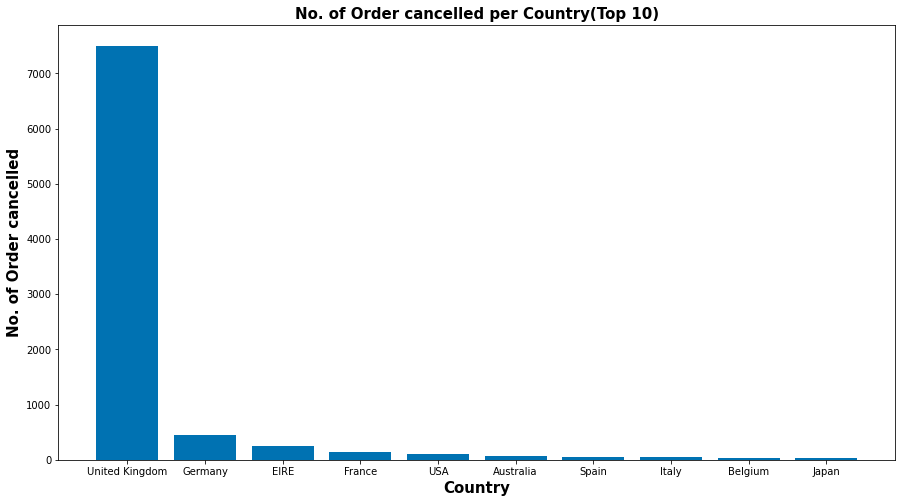

In [ ]:
# Learning through visualization
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=cancelled_orders['Country']
y=cancelled_orders['InvoiceNo']

# creating the bar plot
plt.bar(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=15, weight='bold')
plt.ylabel("No. of Order cancelled", size=15, weight='bold')
plt.title("No. of Order cancelled per Country(Top 10)",size=15, weight='bold')

## Showing the plot
plt.show()


1. United Kingdom has got the maximum number cancelled orders followed by Germany with considerable margin.
2. Australia,Spain,Italy,Belgium,Japan has least and almost negligible amount of cancelled orders.   

In [ ]:
#Taking only invoices which were not cancelled
df = df[~df["InvoiceNo"].str.contains("C", na=False)]

#Taking only postive values from variables
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]
df.shape

Majority of the transactions are from United Kingdom,other countries are costitute very small proportions in order to make our segmentation clean we will be going ahead with the United Kingdom data only.

In [ ]:
# Filtering the dataset 
df = df.loc[df['Country'] == 'United Kingdom']

## **Feature Engineering and EDA On New Features** 

In [ ]:
# Adding new features month , day and hour from invoice date
df['Invoice_day'] = df['InvoiceDate'].dt.day_name()
df['Invoice_hour'] = df['InvoiceDate'].dt.hour 
df['Invoice_month']=df['InvoiceDate'].dt.to_period('M')
df['month']=df['InvoiceDate'].dt.month_name()
df['purchase_date']=df["InvoiceDate"].dt.date

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_day,Invoice_hour,Invoice_month,month,purchase_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      401604 non-null  object        
 1   StockCode      401604 non-null  object        
 2   Description    401604 non-null  object        
 3   Quantity       401604 non-null  int64         
 4   InvoiceDate    401604 non-null  datetime64[ns]
 5   UnitPrice      401604 non-null  float64       
 6   CustomerID     401604 non-null  float64       
 7   Country        401604 non-null  object        
 8   Invoice_day    401604 non-null  object        
 9   Invoice_hour   401604 non-null  int64         
 10  Invoice_month  401604 non-null  period[M]     
 11  month          401604 non-null  object        
 12  purchase_date  401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7), period[M](1)
memory usage: 42.9+ MB


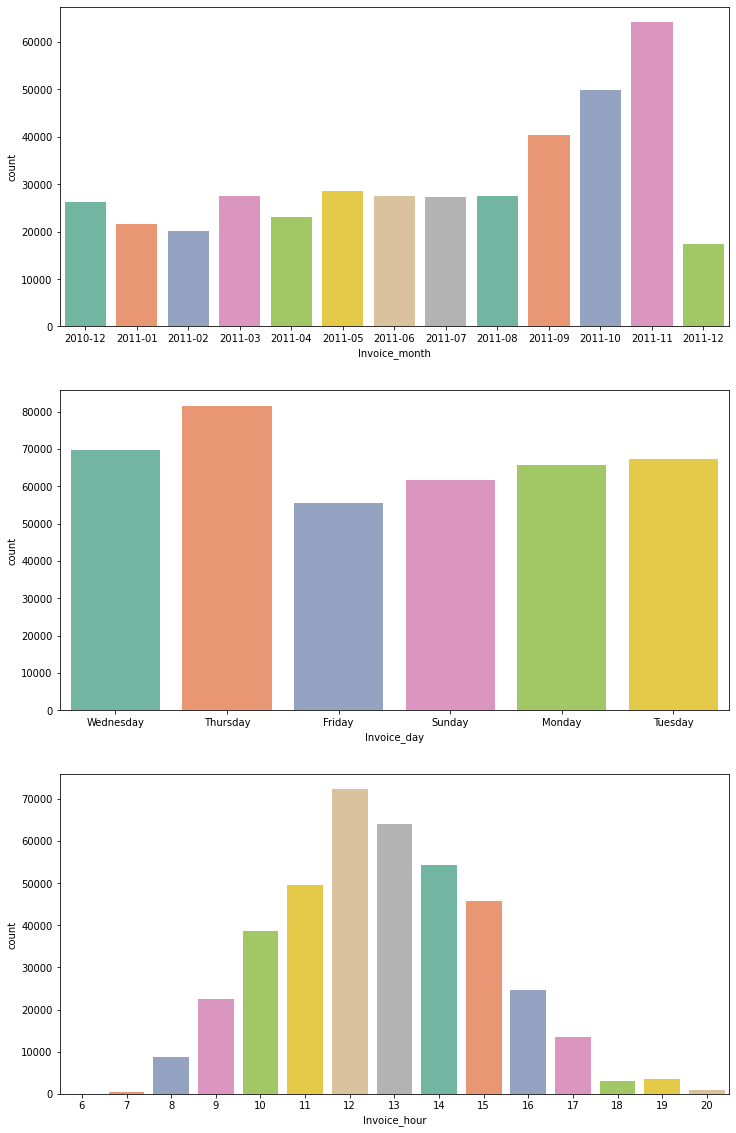

In [ ]:
columns = ['Invoice_month','Invoice_day','Invoice_hour']
fig = plt.figure(figsize=(12,20))
for i in range(len(columns)):
  col=columns[i]
  sub=fig.add_subplot(3,1,i+1)
  chart = sns.countplot(data=df,x=col,palette="Set2")

1. Maximum amount of invoices were generated in the month of November in 2011 that crosses almost 6000 numbers.
2. Talking about day of the week,Thursday can be regarded as the most rushed day in the whole week.
3. Maximum rush was observed in the mid-day i.e. between 12 hrs to 14 hrs. 

In [37]:
# Calculate total price and add to the dataframe
uk_data["Total_sales"] = uk_data["UnitPrice"]*uk_data["Quantity"]

In [38]:
# Looking at the applied changes
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_day,Invoice_hour,Invoice_month,month,purchase_date,Total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01,20.34


In [39]:
## Generating the dataframe of country w.r.t the Revenue generated
Top10_Country_revenue=df.groupby('Country')['Total_sales'].sum().reset_index().sort_values('Total_sales',ascending=False).head(10)
Top10_Country_revenue

,Country,Total_sales
35,United Kingdom,6747156.154
23,Netherlands,284661.540
10,EIRE,250001.780
14,Germany,221509.470
13,France,196626.050
0,Australia,137009.770
32,Switzerland,55739.400
30,Spain,54756.030
3,Belgium,40910.960
31,Sweden,36585.410


<Figure size 864x432 with 0 Axes>

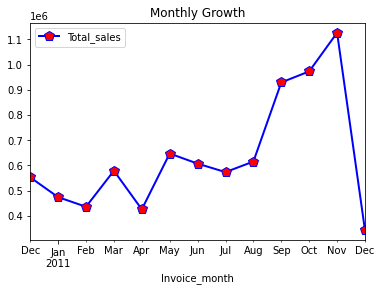

In [40]:
#Let's plot the Monthly growth
plt.figure(figsize = (12,6))
tsales_month = df.groupby('Invoice_month').Total_sales.sum().reset_index()
tsales_month.plot.line(x='Invoice_month',y='Total_sales',title='Monthly Growth',color = 'b',marker='p', markersize=10, linewidth=2,markerfacecolor='red')

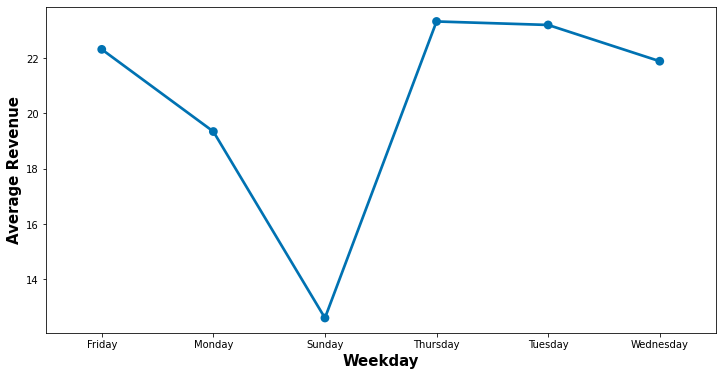

In [41]:
#Bussiest day of the week
tsales_weekday = df.groupby('Invoice_day').Total_sales.mean()
plt.figure(figsize = (12,6))
sns.pointplot(x=tsales_weekday.index, y=tsales_weekday.values)
plt.ylabel('Average Revenue',weight="bold",size=15)
plt.xlabel('Weekday',weight="bold",size=15)
plt.show()

1. Maximum average revenue was observed to be on the Thursday and Friday,On Tuesday also the revenue generated was comparitive.
2. Minimum average revenue was generated on Sundays. 

### **Top 20 Products Sold From the Store**

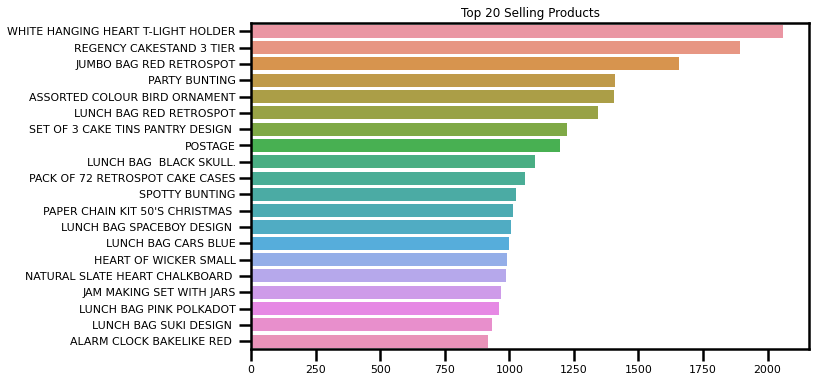

In [42]:
# Creating the required Dataframe
top_products = df['Description'].value_counts()[:20]
plt.figure(figsize=(10,6))

# Plotting the plot
sns.set_context("poster",font_scale=0.5)
sns.barplot(y=top_products.index,x=top_products.values)
plt.title('Top 20 Selling Products')
plt.show()

In [49]:
#changing the datatype of the Customer id
uk_data['CustomerID'] = uk_data['CustomerID'].astype('int64')
#changing the datatype of the purchase_date
uk_data['purchase_date']=uk_data['purchase_date'].astype('datetime64[ns]')

NameError: ignored

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      401604 non-null  object        
 1   StockCode      401604 non-null  object        
 2   Description    401604 non-null  object        
 3   Quantity       401604 non-null  int64         
 4   InvoiceDate    401604 non-null  datetime64[ns]
 5   UnitPrice      401604 non-null  float64       
 6   CustomerID     401604 non-null  int64         
 7   Country        401604 non-null  object        
 8   Invoice_day    401604 non-null  object        
 9   Invoice_hour   401604 non-null  int64         
 10  Invoice_month  401604 non-null  period[M]     
 11  month          401604 non-null  object        
 12  purchase_date  401604 non-null  datetime64[ns]
 13  Total_sales    401604 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(6

In [45]:
#Removing the features that are not required for RFM 			
df.drop(['Invoice_day','Invoice_hour','Invoice_month','month'],axis=1,inplace=True)

## **Create the RFM model (Recency, Frequency,Monetary value)**
Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on

Performing RFM Segmentation and RFM Analysis, Step by Step
The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. ... The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).

Let's define Recency, Frequency and Monetary metrics that milestones for RFM Analysis process


1. Recency => How recent was the customer's last purchase?  Number of days between analysis date and last invoice date

2. Frequency=> How often did this customer make a purchase in a given period? Number of purchases.

3. Monetary  =>  How much money did the customer spend in a given period? In other words , How much money will the company potentially earn from a particular customer?

----> For recency,  we should know the newest date of invoice in our dataset. According to that date, we can specify analysis date which will be using for next steps of our analysis.

In [ ]:
# knowing the latest date in our transaction history
uk_data["purchase_date"].max()

In [ ]:
#choosing selected date in the ame of today's date
today_date = dt.datetime(2011, 12, 11)

In [ ]:
# Creating the RFM dataframe
rfm = df.groupby(['CustomerID'],as_index=False).agg({'purchase_date': lambda purchase_date: (today_date - purchase_date.max()).days,
                                     'InvoiceNo': lambda InvoiceNo: InvoiceNo.count(),
                                     'Total_sales': lambda Total_sales: Total_sales.sum()}).rename(columns = {'purchase_date': 'recency',
                                                                                   'InvoiceNo': 'frequency',
                                                                                   'Total_sales': 'monetary'})

In [ ]:
# Having a look at the initial records of the dataset
rfm.head()

## Customer Segmentation Using Quantiles
Now that we have our values,we need to divide the customers into different quartiles for recency, frequency and monetary, and concatenating the numbers of each quartile.

In [ ]:
#Split into four segments using quantiles
quantiles = rfm.quantile(q=[0.25,0.5,0.75])

#Convert the quantile to dictionary
quantiles = quantiles.to_dict()
quantiles

NameError: ignored

In [ ]:
#Functions to create R, F and M segments.

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
# Now assign segments to customers using the abobe function
rfm['r_quartile'] = rfm['recency'].apply(RScore, args=('recency',quantiles,))
rfm['f_quartile'] = rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
rfm['m_quartile'] = rfm['monetary'].apply(FMScore, args=('monetary',quantiles,))

In [ ]:
# Let's ahve a look for the applied changes
rfm.head()

**** Recency Data Distribution ****


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


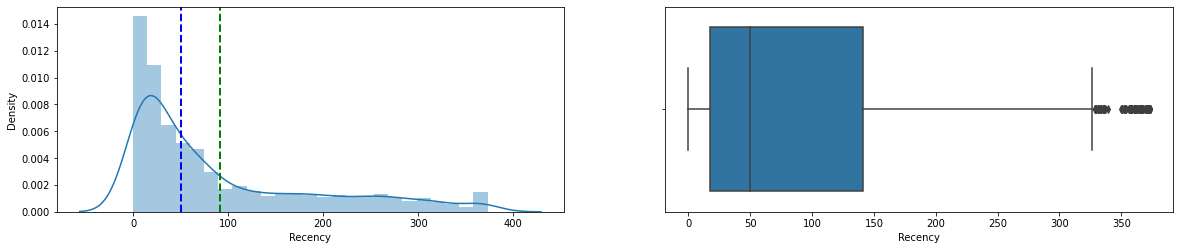


 

**** Frequency Data Distribution ****


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


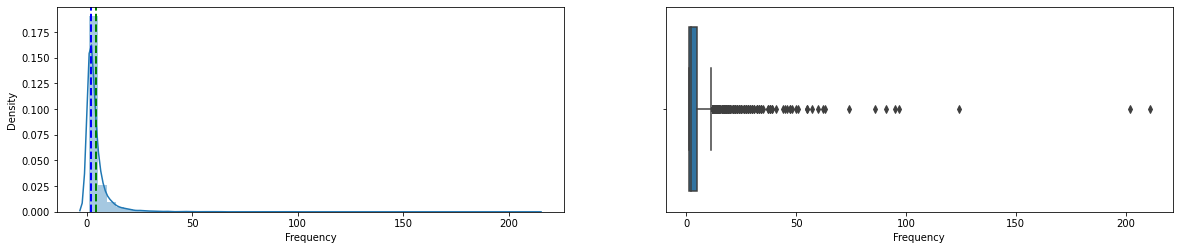


 

**** Monetary Data Distribution ****


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


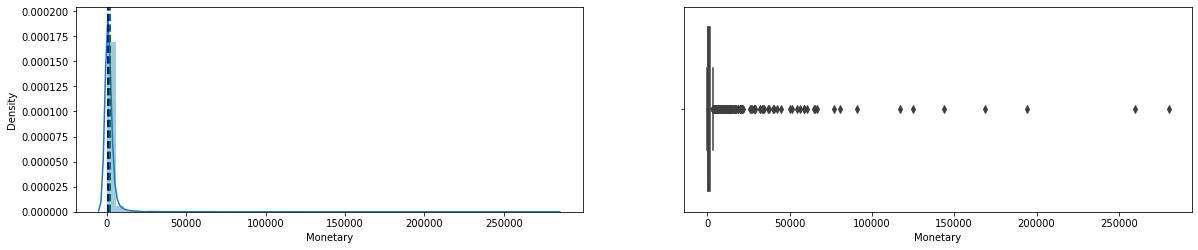

In [ ]:
# Plot Independent Variable
for i in ['Recency','Frequency','Monetary']:
  print(f'**** {i} Data Distribution ****')
  plt.figure(figsize = (20,40))
  plt.subplot(9,2,1)
  sns.distplot(rfm_table[i])
  plt.axvline(rfm_table[i].mean(), color='green', linestyle='dashed', linewidth=2)
  plt.axvline(rfm_table[i].median(), color='blue', linestyle='dashed', linewidth=2)
  plt.subplot(9,2,2)
  sns.boxplot(rfm_table[i])
  plt.show()
  print('\n \n')

**** Recency Data Distribution ****


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


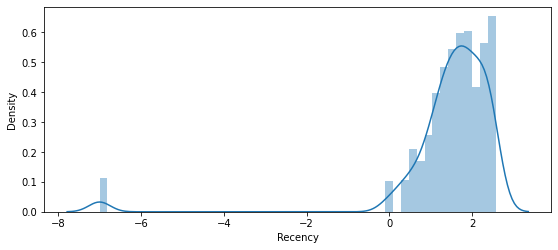


 

**** Frequency Data Distribution ****


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


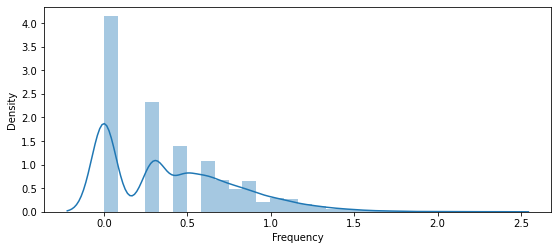


 

**** Monetary Data Distribution ****


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


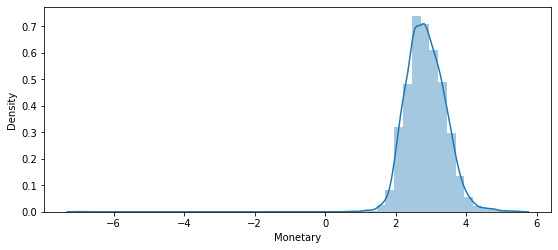

In [ ]:
# Plot Independent Variable
for i in ['Recency','Frequency','Monetary']:
  print(f'**** {i} Data Distribution ****')
  plt.figure(figsize = (20,40))
  plt.subplot(9,2,1)
  sns.distplot(np.log10(rfm_table[i]++0.0000001))
  plt.show()
  print('\n \n')

In [ ]:
from sklearn.preprocessing import StandardScaler # For Standardise our dataset (it require for linear regression) 

X = rfm_table.iloc[:, 1:2].values

StandardScaler().fit_transform(X)


array([[ 2.33485829],
       [-0.90519931],
       [-0.17518634],
       ...,
       [-0.84519825],
       [-0.88519896],
       [-0.49519203]])

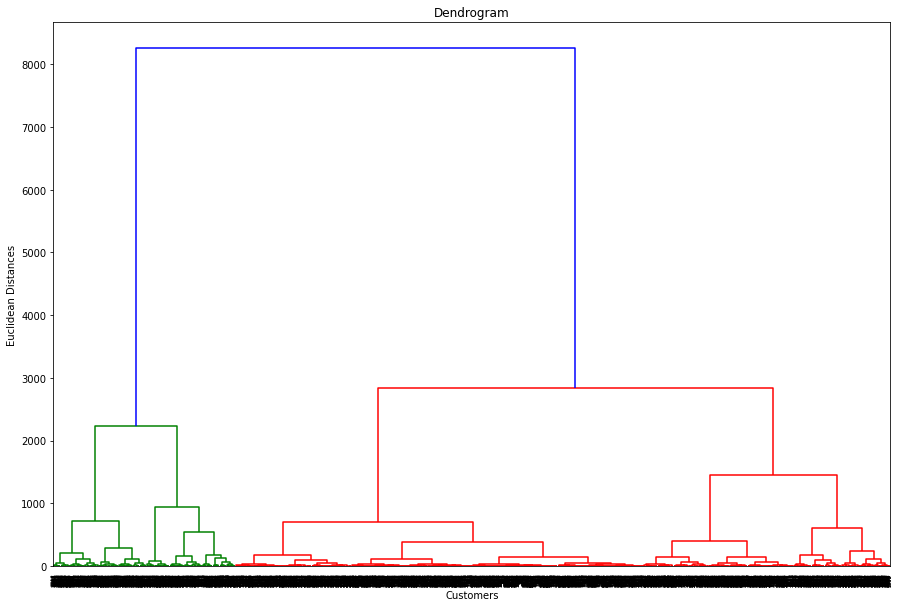

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)